In [28]:
import time
import nltk

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
%%time
# basic imports
import pandas as pd
import numpy as np
import string
import warnings
warnings.filterwarnings('ignore')

#imports for visualisations
import matplotlib.pyplot as plt

# importing libraries for NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

#importing libraries for modelling
import sklearn.metrics as metrics
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.spatial.distance import correlation


CPU times: total: 15.6 ms
Wall time: 26.9 ms


In [31]:
## Importing data
review = pd.read_csv(r'D:\yelp_dataset\yelp_dataset~\IL_review.csv', index_col=0)
business = pd.read_csv(r'D:\yelp_dataset\yelp_dataset~\business.csv', index_col=0)
users = pd.read_csv(r'D:\yelp_dataset\yelp_dataset~\IL_users.csv', index_col=0)



In [32]:
review['categories'] = business['category']

In [33]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,CoatCheck,GoodForKids,BusinessParking,Open24Hours,OutdoorSeating,ByAppointmentOnly,DogsAllowed,Caters,RestaurantsReservations,RestaurantsDelivery
0,ljxNT9p0y7YMPx0fcNBGig,Tony's Restaurant & 3rd Street Cafe,312 Piasa St,Alton,IL,62002,38.896563,-90.186203,3.0,94,...,NaN,True,NaN,NaN,True,NaN,NaN,True,True,False
1,EuRGgOwJ0g1vTj2R04j37Q,Crafty Crab,51 Ludwig Dr,Fairview Heights,IL,62208,38.601298,-89.989683,2.5,14,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,uYBx50Yl_Jc-UYwFzudBsQ,Chew Doin Fried Chicken & Ramen,210 South Buchanan,Edwardsville,IL,62025,38.810591,-89.952484,3.0,10,...,NaN,NaN,NaN,NaN,False,NaN,NaN,False,False,True
3,zjQDk4tZyhEroyqtkgvx0g,The Cobblestone Eatery and Drinkery,115 W St Louis St,Lebanon,IL,62254,38.604107,-89.808533,3.5,52,...,False,True,NaN,NaN,True,False,False,False,False,False
4,gI34hM-873fwF1XQ8hOaSg,Joe’s Pizza and Pasta,"5775 Godfrey Rd, Ste A",Godfrey,IL,62035,38.949183,-90.190306,4.0,17,...,NaN,NaN,NaN,NaN,True,NaN,NaN,True,True,True


In [34]:
# Let us look at the word count in the review text
review['word_count'] = review['text'].apply(lambda x: len(str(x).split(" ")))
review[['text','word_count']].head()

,text,word_count
0,"Traveling through in our RV, stopped over in G...",51
1,The food and service was amazing! I only wish ...,19
2,My husband had the 6 oz pepperloin meal and wa...,45
3,I have been a fan of Chateau La Vin for a few ...,112
4,"Out lunch today was pulled pork, smokehouse bo...",44


In [35]:
# Let us look at the character count in the review text
review['char_count'] = review['text'].str.len() ## this also includes spaces
review[['text','char_count']].head()

,text,char_count
0,"Traveling through in our RV, stopped over in G...",273
1,The food and service was amazing! I only wish ...,109
2,My husband had the 6 oz pepperloin meal and wa...,223
3,I have been a fan of Chateau La Vin for a few ...,549
4,"Out lunch today was pulled pork, smokehouse bo...",248


In [36]:
# Let us look at the average word length in the review text sentence
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

review['avg_word'] = review['text'].apply(lambda x: avg_word(x))
review[['text','avg_word']].head()
#review['text'][1]

,text,avg_word
0,"Traveling through in our RV, stopped over in G...",4.372549
1,The food and service was amazing! I only wish ...,4.789474
2,My husband had the 6 oz pepperloin meal and wa...,4.068182
3,I have been a fan of Chateau La Vin for a few ...,3.910714
4,"Out lunch today was pulled pork, smokehouse bo...",4.880952


In [37]:
# Let us look if there is any text that starts with hashtags
review['hashtags'] = review['text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
review[['text','hashtags']].head()

,text,hashtags
0,"Traveling through in our RV, stopped over in G...",0
1,The food and service was amazing! I only wish ...,0
2,My husband had the 6 oz pepperloin meal and wa...,0
3,I have been a fan of Chateau La Vin for a few ...,0
4,"Out lunch today was pulled pork, smokehouse bo...",0


In [38]:
# Let us look at the count of stopwords present in the review text
stop = stopwords.words('english')

review['stopwords'] = review['text'].apply(lambda x: len([x for x in x.split() if x in stop]))
review[['text','stopwords']].head()

,text,stopwords
0,"Traveling through in our RV, stopped over in G...",21
1,The food and service was amazing! I only wish ...,7
2,My husband had the 6 oz pepperloin meal and wa...,20
3,I have been a fan of Chateau La Vin for a few ...,56
4,"Out lunch today was pulled pork, smokehouse bo...",12


In [39]:
# Let us look at the count of numerics present in the review text
review['numerics'] = review['text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
review[['text','numerics']].head()

,text,numerics
0,"Traveling through in our RV, stopped over in G...",0
1,The food and service was amazing! I only wish ...,0
2,My husband had the 6 oz pepperloin meal and wa...,2
3,I have been a fan of Chateau La Vin for a few ...,0
4,"Out lunch today was pulled pork, smokehouse bo...",0


In [40]:
# Let us include the text length column in review dataset
review['text length'] = review['text'].apply(len)
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,categories,word_count,char_count,avg_word,hashtags,stopwords,numerics,text length
0,Ad91EzbAGRCR1SwkPfZJKg,LWTvg7RlyNLXIf482tXBPw,WCVFqK84i2H5EClSoow7ZA,5.0,0,0,0,"Traveling through in our RV, stopped over in G...",2016-07-21 17:41:18,2016,"Restaurants, Specialty Food, Steakhouses, Food...",51,273,4.372549,0,21,0,273
1,uGJubhANtj6sfP_xz8LeLQ,1EecTw-Iojid62ySMMl5gA,xR3inMR2KceU3b9dhkz_tw,4.0,0,0,0,The food and service was amazing! I only wish ...,2016-01-30 04:15:18,2016,"Seafood, Restaurants",19,109,4.789474,0,7,0,109
2,xqp0pnO0PfBkaFRNaVImYw,c35f8FumQy5045zFbIir6w,_uyLoz0BbrQIVmUEm_td1Q,3.0,0,0,0,My husband had the 6 oz pepperloin meal and wa...,2018-06-09 01:10:44,2018,"Restaurants, Chicken Shop, Ramen, Japanese",45,223,4.068182,0,20,2,223
3,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0,1,0,1,I have been a fan of Chateau La Vin for a few ...,2014-03-14 13:55:46,2014,"American (Traditional), Nightlife, Breakfast &...",112,549,3.910714,0,56,0,549
4,GVoXS_AdNzSUbyNcoErdZQ,rqYkeGG9PBAdMRDvTMCmfw,MVmJuns9ZD9QLGltc0Am8g,5.0,0,0,0,"Out lunch today was pulled pork, smokehouse bo...",2015-11-18 18:51:24,2015,"Salad, Pizza, Restaurants, Italian",44,248,4.880952,0,12,0,248


In [41]:
# separating our features and target
X = review['text']
y = review['stars']

In [42]:
review[['text', 'categories']]

,text,categories
0,"Traveling through in our RV, stopped over in G...","Restaurants, Specialty Food, Steakhouses, Food..."
1,The food and service was amazing! I only wish ...,"Seafood, Restaurants"
2,My husband had the 6 oz pepperloin meal and wa...,"Restaurants, Chicken Shop, Ramen, Japanese"
3,I have been a fan of Chateau La Vin for a few ...,"American (Traditional), Nightlife, Breakfast &..."
4,"Out lunch today was pulled pork, smokehouse bo...","Salad, Pizza, Restaurants, Italian"
...,...,...
586,The service is amazing and the food is wonderf...,"Chinese, Restaurants"
587,Went there July 3rd with Mom for ice cream aft...,"Food, Restaurants, Mexican, Grocery"
588,Tony's is known for their pizza and it did not...,"Restaurants, Thai"
589,Ehhh. This location alway fails! They're much ...,"Chinese, Restaurants"


In [43]:
# creating a bag of words which consist of entire text without punctuations and fiting it
bow_transformer = CountVectorizer().fit(X)

In [44]:
# Looking for the count of features
len(bow_transformer.vocabulary_)

4795

In [45]:
#transform our review text
#%%time
X = bow_transformer.transform(X)


In [46]:
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)

# Percentage of non-zero values
#density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
#print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (591, 4795)
Amount of Non-Zero occurrences:  36475


In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (413, 4795)
Number transactions y_train dataset:  (413,)
Number transactions X_test dataset:  (178, 4795)
Number transactions y_test dataset:  (178,)


In [23]:
#from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '3': {}".format(sum(y_train==3)))
print("Before OverSampling, counts of label '4': {}".format(sum(y_train==4)))
print("Before OverSampling, counts of label '5': {} \n".format(sum(y_train==5)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train_res==3)))
print("After OverSampling, counts of label '4': {}".format(sum(y_train_res==4)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train_res==5)))

Before OverSampling, counts of label '1': 46
Before OverSampling, counts of label '2': 41
Before OverSampling, counts of label '3': 63
Before OverSampling, counts of label '4': 100
Before OverSampling, counts of label '5': 163 

After OverSampling, the shape of train_X: (815, 4795)
After OverSampling, the shape of train_y: (815,) 

After OverSampling, counts of label '1': 163
After OverSampling, counts of label '2': 163
After OverSampling, counts of label '3': 163
After OverSampling, counts of label '4': 163
After OverSampling, counts of label '5': 163


In [48]:
# Let us now train the model using Multinomial Naive Bais Algorithm
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [49]:

#  predict on the test set
preds = nb.predict(X_test)

In [50]:
# evaluating our model using confusion matrix and classification report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print(metrics.accuracy_score(y_test, preds))

[[ 6  1  3  5  9]
 [ 2  3  8  9  4]
 [ 0  0  5  6 11]
 [ 0  0  1 13 29]
 [ 1  0  0  6 56]]


              precision    recall  f1-score   support

         1.0       0.67      0.25      0.36        24
         2.0       0.75      0.12      0.20        26
         3.0       0.29      0.23      0.26        22
         4.0       0.33      0.30      0.32        43
         5.0       0.51      0.89      0.65        63

    accuracy                           0.47       178
   macro avg       0.51      0.36      0.36       178
weighted avg       0.50      0.47      0.42       178

0.46629213483146065


In [53]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

#Macro averaging reduces your multiclass predictions down to multiple sets of binary predictions, 
#calculates the corresponding metric for each of the binary cases, and then averages the results together.
result = precision_recall_fscore_support(y_test, preds, average='macro')
print(result)
precision = result[0]
recall = result[1]
print('Precision is ', precision)
print('Recall is ', recall)

(0.5115758229897464, 0.3567743625883161, 0.3576565162952004, None)
Precision is  0.5115758229897464
Recall is  0.3567743625883161


In [54]:
X_test.shape[0]

178

In [56]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=2)
roc_auc = auc(fpr, tpr)

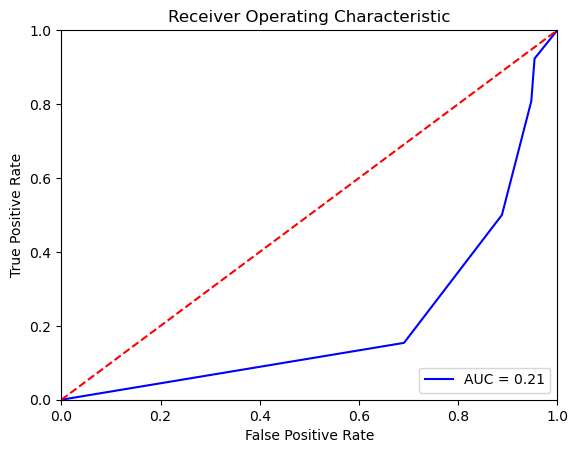

In [57]:
# Evaluating the model 

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [59]:
# adding predicted ratings to reviews

def predict_review(value,bow_transformer,nb,review):
    review_verdict = review['text'][value]
    review_verdict_transformed = bow_transformer.transform([review_verdict])
    predicted_rating = nb.predict(review_verdict_transformed)[0]
    check_df = pd.DataFrame(columns=review.columns)
    check_df.loc[0] = review.iloc[value]
    check_df['Predicted'] = predicted_rating
    return check_df

In [60]:
new_df = pd.DataFrame()
for i in range(0, len(review)):
    row_df = predict_review(i, bow_transformer,nb,review)
    new_df = pd.concat([row_df, new_df], ignore_index=True)

In [63]:
business_new = pd.merge(business, review, on='business_id', how='inner')
sim_df = business_new[['name', 'business_id', 'categories', 'text']]
sim_df.head()

,name,business_id,categories,text
0,Tony's Restaurant & 3rd Street Cafe,ljxNT9p0y7YMPx0fcNBGig,"Restaurants, Fast Food, Burgers","We had been driving around for some time, on a..."
1,Tony's Restaurant & 3rd Street Cafe,ljxNT9p0y7YMPx0fcNBGig,"Pizza, Restaurants, Sandwiches, Chicken Wings",This place has gone so far downhill it's not e...
2,Tony's Restaurant & 3rd Street Cafe,ljxNT9p0y7YMPx0fcNBGig,"Restaurants, Sandwiches, Fast Food",Good resturant that I frequent. Chicken Kabob...
3,Tony's Restaurant & 3rd Street Cafe,ljxNT9p0y7YMPx0fcNBGig,"Caterers, Event Planning & Services, Restauran...",ULTIMATE POTATO BURGER\n(2) 1/2 pound patties ...
4,Tony's Restaurant & 3rd Street Cafe,ljxNT9p0y7YMPx0fcNBGig,"American (New), Restaurants",Oh Tonys... A staple in Alton. Home wouldn't b...


In [64]:
# Computing the vectorisation of review text by fitting and transforming it
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(sim_df['text'])

In [65]:
# Let us now compute the cosine similarity for the computed matrix consisting of businesses
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [66]:
# function that returns top 10 most similar businesses based on cosine similarity scores
sim_df_pred = sim_df.reset_index()
name_x = sim_df['name']
indices = pd.Series(sim_df.index, index=sim_df['name'])

In [69]:
new_df


,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,categories,word_count,char_count,avg_word,hashtags,stopwords,numerics,text length,Predicted
0,Fh6gvUTBH6sP_FUrQ9lXcg,hGlfYZNmF2AMkE-pFZOoCQ,gXg277YblY5xsaeMzJ73TA,4.0,1,0,0,"Great food.\nThe food has a unique, sour due t...",2015-09-16 23:35:07,2015,"Food, Ice Cream & Frozen Yogurt",50,282,4.301887,0,21,0,282,4.0
1,qCa0M6Jt1uxum_esuseNnQ,IcowqfUjDSmdwtT0vp4pRg,Ho0uAnaLL57On7enESYfeA,2.0,2,0,0,Ehhh. This location alway fails! They're much ...,2015-01-23 02:35:14,2015,"Chinese, Restaurants",37,228,5.189189,0,10,0,228,4.0
2,7rUiU8-jRX3Wol_lVXfqQQ,vbGGRxKJocP7EQYs-sUhyw,ljxNT9p0y7YMPx0fcNBGig,4.0,2,0,3,Tony's is known for their pizza and it did not...,2012-06-28 14:20:12,2012,"Restaurants, Thai",60,329,4.466667,0,25,0,329,4.0
3,Vs4R3g9pCCRCs6YNfsIhIg,EDAg3FUbil6oIIY0HJctBA,hr5xn72O1JGig3R_P9w0KQ,3.0,0,0,0,Went there July 3rd with Mom for ice cream aft...,2015-07-07 03:35:53,2015,"Food, Restaurants, Mexican, Grocery",89,509,4.730337,0,33,0,509,3.0
4,lCgkHZNcUJUwf4IoCmfGUg,BWUZMEvBr6NSJzFf89KtKQ,IS0B5nLJPluVT8NwGgospA,5.0,0,0,0,The service is amazing and the food is wonderf...,2017-12-20 00:17:47,2017,"Chinese, Restaurants",57,320,4.631579,0,19,0,320,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,GVoXS_AdNzSUbyNcoErdZQ,rqYkeGG9PBAdMRDvTMCmfw,MVmJuns9ZD9QLGltc0Am8g,5.0,0,0,0,"Out lunch today was pulled pork, smokehouse bo...",2015-11-18 18:51:24,2015,"Salad, Pizza, Restaurants, Italian",44,248,4.880952,0,12,0,248,5.0
587,91uC4f0aX4ycQTDL5Hq7Mw,huHPQSQgw4kFakc0Vq7TDA,_D7QoWuQKMXk0mEE7r_Ftw,5.0,1,0,1,I have been a fan of Chateau La Vin for a few ...,2014-03-14 13:55:46,2014,"American (Traditional), Nightlife, Breakfast &...",112,549,3.910714,0,56,0,549,5.0
588,xqp0pnO0PfBkaFRNaVImYw,c35f8FumQy5045zFbIir6w,_uyLoz0BbrQIVmUEm_td1Q,3.0,0,0,0,My husband had the 6 oz pepperloin meal and wa...,2018-06-09 01:10:44,2018,"Restaurants, Chicken Shop, Ramen, Japanese",45,223,4.068182,0,20,2,223,5.0
589,uGJubhANtj6sfP_xz8LeLQ,1EecTw-Iojid62ySMMl5gA,xR3inMR2KceU3b9dhkz_tw,4.0,0,0,0,The food and service was amazing! I only wish ...,2016-01-30 04:15:18,2016,"Seafood, Restaurants",19,109,4.789474,0,7,0,109,5.0


In [68]:
## recommender function

def recommend(user_id):
    value = new_df[new_df['user_id'] == user_id]
    predicted_stars = value['Predicted']
    recommended_restaurants = new_df[new_df['Predicted'] >= predicted_stars.tolist()[0]]
    business_val = business[business['business_id'] == value.business_id.tolist()[0]]['name']
    name = business_val.tolist()[0]
    name_x = name
    idx = indices[name_x]

    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: np.any(x[1]), reverse=True)
    restaurent_indices = [i[0] for i in sim_scores]
    names = np.unique(sim_df['name'].iloc[restaurent_indices])
    return names


## recommend restaurants to first five users

for review in users.head().itertuples():
    restaurants = recommend(review.user_id)
    print('\n\nRestaurants Recommended \n')
    for r in restaurants:
        print(r)



Restaurants Recommended 

Cheddar's Scratch Kitchen
Imo's Pizza
The Cobblestone Eatery and Drinkery
Tony's Restaurant & 3rd Street Cafe
Triple R's Smokehouse


Restaurants Recommended 

The Cobblestone Eatery and Drinkery
Tony's Restaurant & 3rd Street Cafe
Triple R's Smokehouse


Restaurants Recommended 

Tony's Restaurant & 3rd Street Cafe


Restaurants Recommended 

A Little Taste of Heaven Bakery
Acropolis
Aiello's Pizzeria
Aldi
Arby's
Aroy Thai
Bobeck's Sports Bar & Grill
Bully's Smokehouse
Carisilo's Mexican Restaurant
Casa Azteca
Catrina's
Chateau La VIn
Cheddar's Scratch Kitchen
Chick-fil-A
Cunetto's Corner Cucina
Dewey's Pizza
Donatello's
Dragon Palace
Edison's Entertainment Complex
Farm Fresh Milk Store
Firehouse Subs
Flying J Travel Center
Franks Restaurant
Gators
Gentelin's On Broadway
Gia's Pizza
Golden Corral Buffet & Grill
Goldy's Chick - n - Mex
Good Times Saloon
Grace Manor Restaurant
Great Rivers Tap & Grill
Hardee's
Hy-Ho Cafe
Imo's Pizza
Itty-Bitty
Jack in the Box